# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 617


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?q="
    
# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")


# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city- need to request "metric" to retrieve C values.
    city_url = url + city + "&appid=" + weather_api_key + "&units=metric"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]
        
        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | port lincoln
Processing Record 2 of Set 1 | puerto ayora
Processing Record 3 of Set 1 | bethel
Processing Record 4 of Set 1 | papatowai
Processing Record 5 of Set 1 | olonkinbyen
Processing Record 6 of Set 1 | bilibino
Processing Record 7 of Set 1 | ushuaia
Processing Record 8 of Set 1 | howard springs
Processing Record 9 of Set 1 | balfour
Processing Record 10 of Set 1 | taro
Processing Record 11 of Set 1 | jamestown
Processing Record 12 of Set 1 | sassandra
Processing Record 13 of Set 1 | ballerup
Processing Record 14 of Set 1 | adamstown
Processing Record 15 of Set 1 | lihue
Processing Record 16 of Set 1 | isola di capo rizzuto
Processing Record 17 of Set 1 | bel ombre
Processing Record 18 of Set 1 | alo
Processing Record 19 of Set 1 | les anglais
Processing Record 20 of Set 1 | nemuro
Processing Record 21 of Set 1 | south hedland
Processing Record 22 of Set 1 | lushun
Processing Record 23 of 

Processing Record 34 of Set 4 | odesskoye
Processing Record 35 of Set 4 | baruun-urt
Processing Record 36 of Set 4 | punta arenas
Processing Record 37 of Set 4 | pionerskiy
Processing Record 38 of Set 4 | boa vista
Processing Record 39 of Set 4 | mstsislaw
Processing Record 40 of Set 4 | yerofey pavlovich
Processing Record 41 of Set 4 | lompoc
Processing Record 42 of Set 4 | ta`u
Processing Record 43 of Set 4 | tawau
Processing Record 44 of Set 4 | la passe
Processing Record 45 of Set 4 | at taj
Processing Record 46 of Set 4 | fortuna
Processing Record 47 of Set 4 | dolores
Processing Record 48 of Set 4 | kodiak
Processing Record 49 of Set 4 | dunedin
Processing Record 0 of Set 5 | macheng
Processing Record 1 of Set 5 | weiser
Processing Record 2 of Set 5 | tadine
Processing Record 3 of Set 5 | bredasdorp
Processing Record 4 of Set 5 | hobyo
Processing Record 5 of Set 5 | yellowknife
Processing Record 6 of Set 5 | pisco
Processing Record 7 of Set 5 | jacksonville
Processing Record 8 of

Processing Record 27 of Set 8 | suva
Processing Record 28 of Set 8 | treuchtlingen
Processing Record 29 of Set 8 | suntar
Processing Record 30 of Set 8 | ulaangom
Processing Record 31 of Set 8 | medina
Processing Record 32 of Set 8 | archangelos
Processing Record 33 of Set 8 | aleksandrov gay
Processing Record 34 of Set 8 | at-bashi
Processing Record 35 of Set 8 | serhetabat
Processing Record 36 of Set 8 | yeed
Processing Record 37 of Set 8 | albert
Processing Record 38 of Set 8 | sarupathar
Processing Record 39 of Set 8 | portland
Processing Record 40 of Set 8 | kollam
Processing Record 41 of Set 8 | pariaman
Processing Record 42 of Set 8 | lisakovsk
Processing Record 43 of Set 8 | teluknaga
Processing Record 44 of Set 8 | bismil
Processing Record 45 of Set 8 | arraial do cabo
Processing Record 46 of Set 8 | qarauyl
Processing Record 47 of Set 8 | akureyri
Processing Record 48 of Set 8 | mount gambier
Processing Record 49 of Set 8 | rovaniemi
Processing Record 0 of Set 9 | kirillov
Pr

Processing Record 18 of Set 12 | lewistown
Processing Record 19 of Set 12 | dolbeau-mistassini
Processing Record 20 of Set 12 | as sulayyil
Processing Record 21 of Set 12 | aykhal
Processing Record 22 of Set 12 | peniche
Processing Record 23 of Set 12 | caleta de carquin
Processing Record 24 of Set 12 | rawai
Processing Record 25 of Set 12 | ca mau
Processing Record 26 of Set 12 | port moresby
Processing Record 27 of Set 12 | mahanje
Processing Record 28 of Set 12 | visby
Processing Record 29 of Set 12 | san angelo
Processing Record 30 of Set 12 | nukunonu
City not found. Skipping...
Processing Record 31 of Set 12 | oyem
Processing Record 32 of Set 12 | lampazos de naranjo
Processing Record 33 of Set 12 | pandan
Processing Record 34 of Set 12 | letlhakane
Processing Record 35 of Set 12 | hanceville
Processing Record 36 of Set 12 | ulladulla
Processing Record 37 of Set 12 | begoro
Processing Record 38 of Set 12 | kone
Processing Record 39 of Set 12 | shache
Processing Record 40 of Set 1

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          586
Lat           586
Lng           586
Max Temp      586
Humidity      586
Cloudiness    586
Wind Speed    586
Country       586
Date          586
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,port lincoln,-34.7333,135.8667,14.28,76,31,2.28,AU,1683586737
1,puerto ayora,-0.7393,-90.3518,30.98,91,70,2.68,EC,1683586760
2,bethel,41.3712,-73.4140,22.20,29,0,2.57,US,1683587106
3,papatowai,-46.5619,169.4708,18.12,90,97,5.47,NZ,1683586762
4,olonkinbyen,70.9221,-8.7187,2.00,99,100,1.57,SJ,1683586500


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port lincoln,-34.7333,135.8667,14.28,76,31,2.28,AU,1683586737
1,puerto ayora,-0.7393,-90.3518,30.98,91,70,2.68,EC,1683586760
2,bethel,41.3712,-73.4140,22.20,29,0,2.57,US,1683587106
3,papatowai,-46.5619,169.4708,18.12,90,97,5.47,NZ,1683586762
4,olonkinbyen,70.9221,-8.7187,2.00,99,100,1.57,SJ,1683586500


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

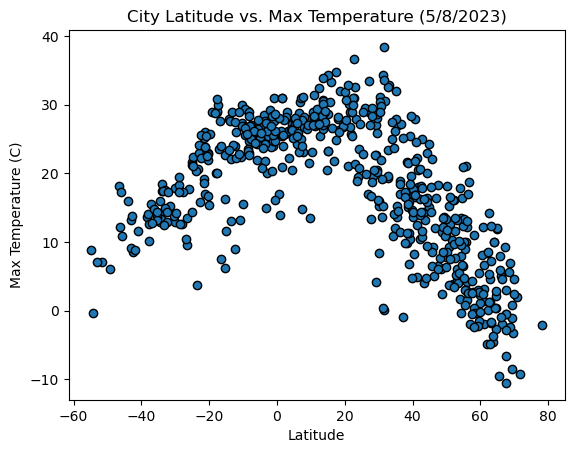

In [8]:
# Build scatter plot for latitude vs. temperature
lat = city_data_df["Lat"]
temp = city_data_df["Max Temp"]
plt.scatter(lat, temp, edgecolor ='black')

# # Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (5/8/2023)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")

# # Save the figure
plt.savefig("output_data/Fig1.png")

# # Show plot
plt.show()



#### Latitude Vs. Humidity

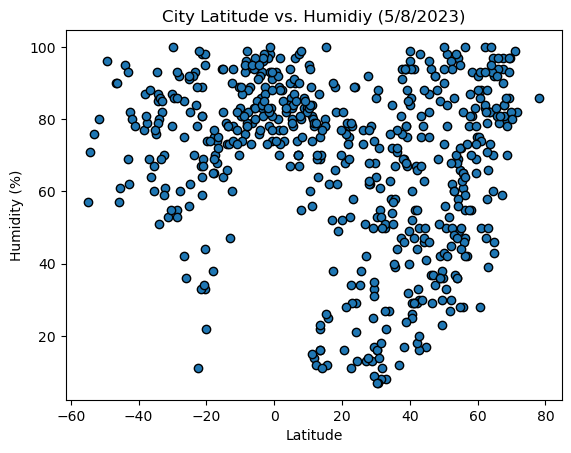

In [9]:
# Build scatter plot for latitude vs. temperature
# YOUR CODE HERE
lat = city_data_df["Lat"]
temp = city_data_df["Humidity"]
plt.scatter(lat, temp, edgecolor ='black')

# # Incorporate the other graph properties
plt.title("City Latitude vs. Humidiy (5/8/2023)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

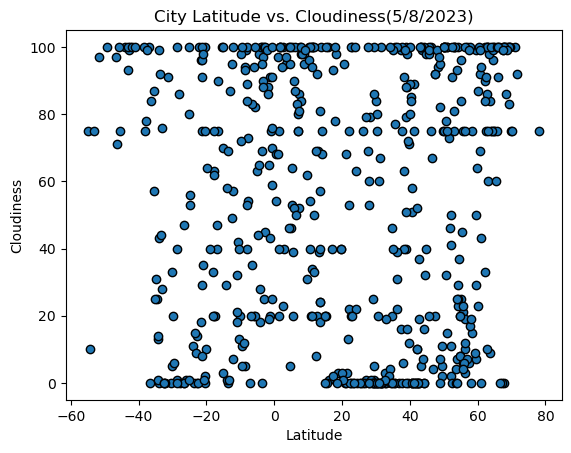

In [10]:
#Latitude vs. Cloudiness
lat = city_data_df["Lat"]
temp = city_data_df["Cloudiness"]
plt.scatter(lat, temp, edgecolor ='black')

# # Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness(5/8/2023)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

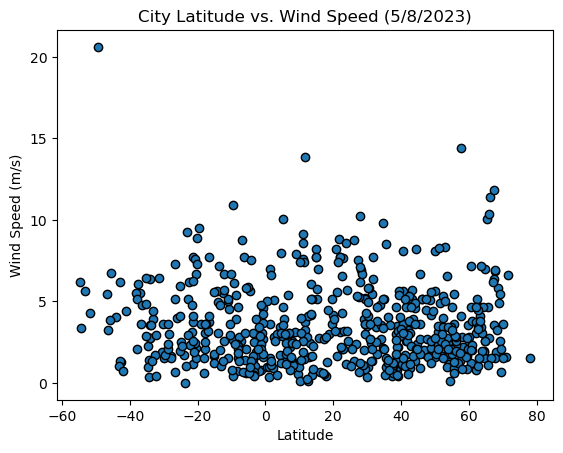

In [11]:
# Build the scatter plots for latitude vs. wind speed
lat = city_data_df["Lat"]
temp = city_data_df["Wind Speed"]
plt.scatter(lat, temp, edgecolor ='black')

# # Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (5/8/2023)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
# Requires input of x_values and y_values as well as annotation location 
#(may need adjusted when data is rerun if data points obscure text)

def linear_regression(x_values, y_values, x_annotate, y_annotate):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    text = plt.annotate(line_eq,(x_annotate, y_annotate),fontsize=15,color="red")
    print(f'The r-value is {rvalue}')
    return

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,bethel,41.3712,-73.4140,22.20,29,0,2.57,US,1683587106
4,olonkinbyen,70.9221,-8.7187,2.00,99,100,1.57,SJ,1683586500
5,bilibino,68.0546,166.4372,-2.57,80,100,1.89,RU,1683587347
10,jamestown,42.0970,-79.2353,18.07,44,0,3.60,US,1683587028
11,sassandra,4.9500,-6.0833,26.77,86,46,2.85,CI,1683587098


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]
# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port lincoln,-34.7333,135.8667,14.28,76,31,2.28,AU,1683586737
1,puerto ayora,-0.7393,-90.3518,30.98,91,70,2.68,EC,1683586760
3,papatowai,-46.5619,169.4708,18.12,90,97,5.47,NZ,1683586762
6,ushuaia,-54.8000,-68.3000,8.81,57,75,6.17,AR,1683587347
7,howard springs,-12.4970,131.0470,23.95,60,49,5.53,AU,1683587347


###  Temperature vs. Latitude Linear Regression Plot

The r-value is -0.8191163444233374


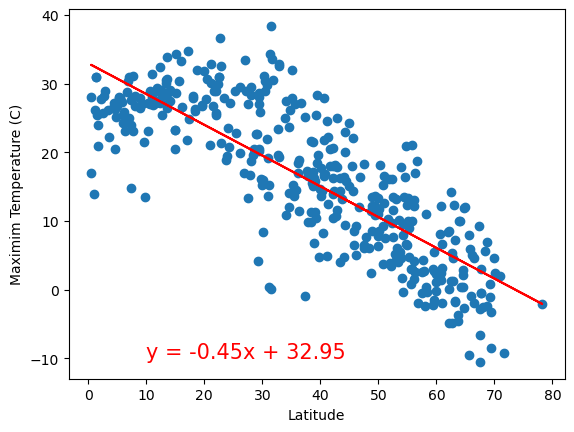

In [15]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
x_annotate = 10
y_annotate = -10


linear_regression(x_values, y_values, x_annotate, y_annotate)
plt.xlabel('Latitude')
plt.ylabel('Maximim Temperature (C)')


plt.show()

The r-value is 0.742652356481699


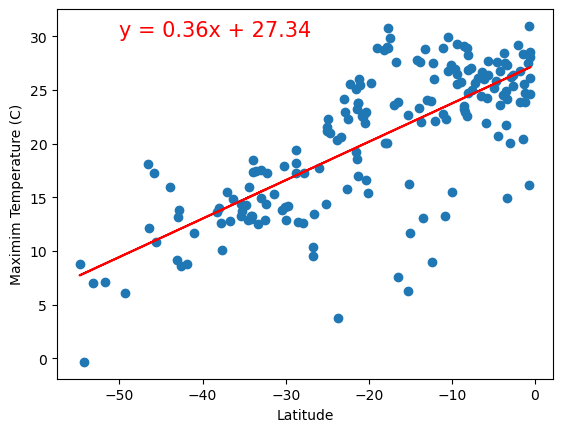

In [16]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
x_annotate = -50
y_annotate = 30


linear_regression(x_values, y_values, x_annotate, y_annotate)
plt.xlabel('Latitude')
plt.ylabel('Maximim Temperature (C)')
plt.show()

**Discussion about the linear relationship:** There is a clear correllation between temperature and proximity to the equator. In the chart describing the Northern Hemisphere, temperature decreases as distance from the equator and in the Southern Hemisphere, temperature increases as distance to the equator decreases. The high r-values of both plots suggest a strong correlation between latitude and temperature.

### Humidity vs. Latitude Linear Regression Plot

The r-value is 0.03887231058810281


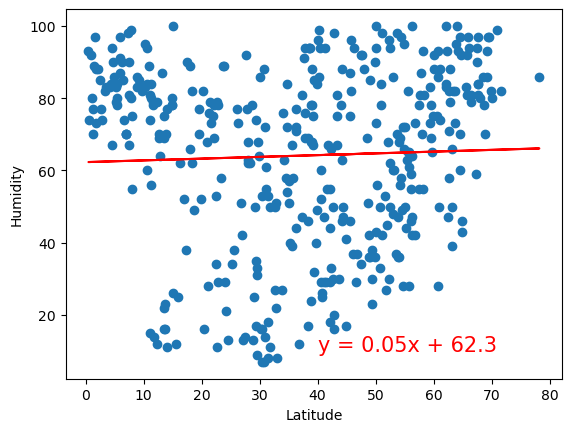

In [17]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
x_annotate = 40
y_annotate = 10


linear_regression(x_values, y_values, x_annotate, y_annotate)
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.show()

The r-value is 0.24241733185349276


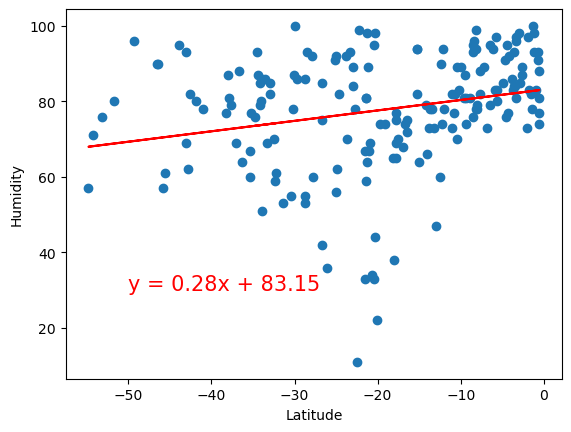

In [18]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
x_annotate = -50
y_annotate = 30


linear_regression(x_values, y_values, x_annotate, y_annotate)
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.show()

**Discussion about the linear relationship:** The r-values of both the Northern and Southern Hemisphere are low, suggesting that there is not a strong relationship between humidity and latitude. Furthermore, since both charts display a positive correlation, they do not trend towards each other at the equator, but rather humidity increases slightly in the Norther Hemisphere as distance from the equator increases and humidity decreases as distance from the equator increases in the Southern Hemisphere. This could point to larger seasonal trends, so it would be useful to look at data from at least a year before drawing any conclusions regarding humidity vs. latitude.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is 0.05767070124186648


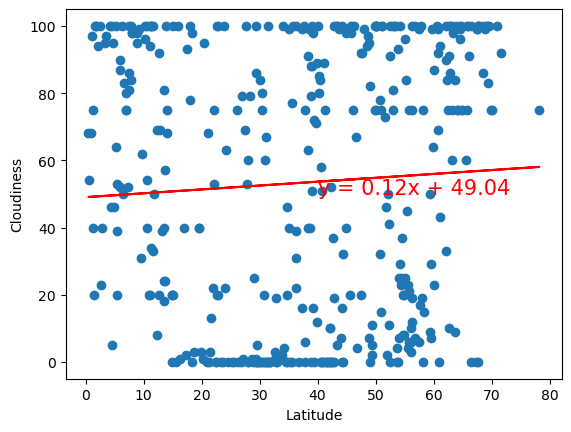

In [19]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
x_annotate = 40
y_annotate = 50


linear_regression(x_values, y_values, x_annotate, y_annotate)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.show()

The r-value is 0.0039553720099867375


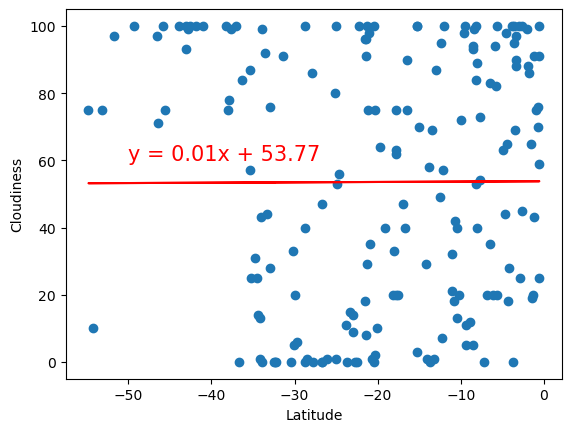

In [20]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
x_annotate = -50
y_annotate = 60


linear_regression(x_values, y_values, x_annotate, y_annotate)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.show()

**Discussion about the linear relationship:** The plots of Latitude vs. Cloudiness are similar to those examining Humidity, with a low r-value for both, indicating a very weak connection between the variables. Also, as with humidity, both plots show a positive correlation, indicating that there is not a strong relationship between proximity to the equator and cloudiness, but that cloudiness increases (slightly) as one moves north. Again, this may be tied to larger seasonal weather trends.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is -0.01665323809937395


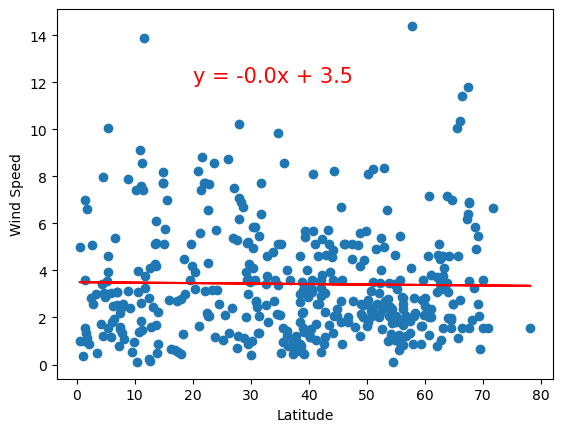

In [21]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
x_annotate = 20
y_annotate = 12


linear_regression(x_values, y_values, x_annotate, y_annotate)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.show()

The r-value is -0.1920121374347049


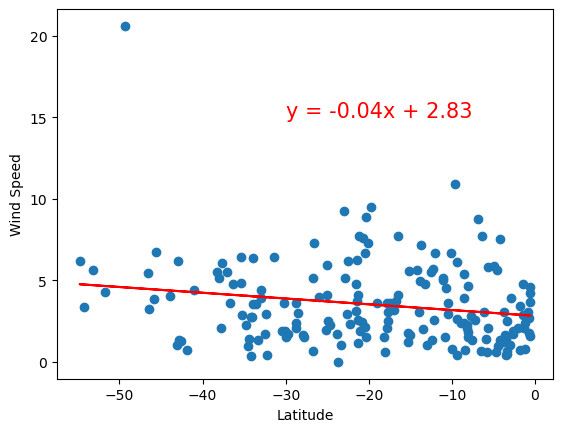

In [22]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
x_annotate = -30
y_annotate = 15


linear_regression(x_values, y_values, x_annotate, y_annotate)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.show()

**Discussion about the linear relationship:** The 2 plots examining Wind Speed versus latitude have little in common. In the Norther Hemisphere, the r-value is almost 0, indicating that there is no relationship between the 2 variables. In the Southern Hemisphere, there is a small decrease in Wind Speed as distance to the equator decreases. With an r-value of .20, it is not enough of a relation to draw any conclusions from.

Overall, Temperature is the only one of the weather conditions examined that implies a strong relationship with Latitude. In both hemispheres, temperature increases as distance to the equator decreases.